# __WeatherPy__

---

###### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they help you think through the steps

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import numpy as np
import requests 
import json
import time
import scipy
import scipy.stats
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output FILE (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitues
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Inclue a print log of each city as it's being processed (with city number and city name)

In [6]:
# Set user url links
url_end = '&APPID=' + api_key
url_base = 'http://api.openweathermap.org/data/2.5/weather?q='

data = {}

#loop through cities, check to see if city not in weather API
print('Beginning Data Retrieval')
print('-------------------------')
counter = 0
for city in cities:
    print('Processing Record ' + str(counter) + '| ' + city)
    url = url_base + city + url_end
    response = requests.get(url).json()
    if response['cod'] == '404':
        print(response['message'].title() + '. Skipping...')
    else:
        data[counter] = response
    counter += 1
print('-------------------------')    
print('Data Retrieval Complete')
print('-------------------------')


Beginning Data Retrieval
-------------------------
Processing Record 0| Vaini
Processing Record 1| Buraydah
Processing Record 2| Carnarvon
Processing Record 3| Wajir
Processing Record 4| Berehove
Processing Record 5| Chapais
Processing Record 6| Upernavik
Processing Record 7| Rikitea
Processing Record 8| Busselton
Processing Record 9| Saint-Joseph
Processing Record 10| Hithadhoo
Processing Record 11| Coihaique
Processing Record 12| Batemans Bay
Processing Record 13| Longyearbyen
Processing Record 14| La Ronge
Processing Record 15| Havelock
Processing Record 16| New Norfolk
Processing Record 17| Belushya Guba
City Not Found. Skipping...
Processing Record 18| Vaitupu
City Not Found. Skipping...
Processing Record 19| Taian
City Not Found. Skipping...
Processing Record 20| Verkhniy Tagil
Processing Record 21| Kropotkin
Processing Record 22| Beyla
Processing Record 23| Oxford
Processing Record 24| Puerto Ayora
Processing Record 25| Punta Arenas
Processing Record 26| Hilo
Processing Record 2

Processing Record 231| Constitucion
Processing Record 232| Praia
Processing Record 233| Panguna
Processing Record 234| Toamasina
Processing Record 235| Cleethorpes
Processing Record 236| Filotion
Processing Record 237| Tasiilaq
Processing Record 238| Kununurra
Processing Record 239| Abeche
Processing Record 240| Florida
Processing Record 241| Maarianhamina
City Not Found. Skipping...
Processing Record 242| Tall Kayf
Processing Record 243| Sioux Lookout
Processing Record 244| Yulara
Processing Record 245| Hovd
Processing Record 246| Iquique
Processing Record 247| East London
Processing Record 248| Huejuquilla El Alto
Processing Record 249| Annigeri
Processing Record 250| Pevek
Processing Record 251| Natal
Processing Record 252| Grand River South East
City Not Found. Skipping...
Processing Record 253| Mahebourg
Processing Record 254| Mackay
Processing Record 255| Meyungs
City Not Found. Skipping...
Processing Record 256| Zachagansk
City Not Found. Skipping...
Processing Record 257| Linxi

Processing Record 467| Cidreira
Processing Record 468| Teya
Processing Record 469| Keti Bandar
Processing Record 470| Vila Franca Do Campo
Processing Record 471| Nanakuli
Processing Record 472| Harrisburg
Processing Record 473| Kuandian
Processing Record 474| Viedma
Processing Record 475| Man
Processing Record 476| Ewa Beach
Processing Record 477| Foso
Processing Record 478| Banjar
Processing Record 479| Chagda
City Not Found. Skipping...
Processing Record 480| Baker City
Processing Record 481| Los Llanos De Aridane
Processing Record 482| Roald
Processing Record 483| Samana
Processing Record 484| Broome
Processing Record 485| Sayyan
Processing Record 486| Sao Desiderio
Processing Record 487| Akdepe
Processing Record 488| Mount Gambier
Processing Record 489| Yataity
Processing Record 490| Mayumba
Processing Record 491| Podbrdo
Processing Record 492| Jiayuguan
Processing Record 493| Qasigiannguit
Processing Record 494| Gimli
Processing Record 495| Kinanah
City Not Found. Skipping...
Proc

In [7]:
# Data Munging to create Cities DF
cities_df = pd.DataFrame(data)
cities_df = cities_df.transpose()

# Extract values in certain columns
cities_df['clouds'] = cities_df['clouds'].apply(lambda x: x.get('all'))
cities_df['latitude'] = cities_df['coord'].apply(lambda x: x.get('lat'))
cities_df['longitude'] = cities_df['coord'].apply(lambda x: x.get('lon'))
cities_df['temp'] = cities_df['main'].apply(lambda x: x.get('temp'))
cities_df['country'] = cities_df['sys'].apply(lambda x: x.get('country'))
cities_df['date'] = cities_df['dt'].apply(lambda x: time.strftime("%D %H:%M", time.localtime(int(x))))
cities_df['humidity'] = cities_df['main'].apply(lambda x: x.get('humidity'))
cities_df['wind speed'] = cities_df['wind'].apply(lambda x: x.get('speed'))

# Change temp to Fahrenheit
cities_df['temp'] = cities_df['temp'].apply(lambda x: ((x - 273.15) * 9/5 + 32))
# Change column names
cities_df = cities_df.rename(columns={'name':'city', 'clouds':'cloudiness'})

# Data Munging to only keep wanted columns
cols = list(cities_df.columns.values)
cols = ['city','country','id','date','latitude','longitude','temp','cloudiness','wind speed','humidity']
cities_df = cities_df[cols]

cities_df.head()


,city,country,id,date,latitude,longitude,temp,cloudiness,wind speed,humidity
0,Vaini,IN,1273574,10/28/19 13:17,15.34,74.49,69.566,85,1.26,92
1,Buraydah,SA,107304,10/28/19 13:18,26.33,43.97,80.600,20,7.20,74
2,Carnarvon,ZA,1014034,10/28/19 13:16,-30.97,22.13,47.066,0,9.83,39
3,Wajir,KE,178443,10/28/19 13:18,1.75,40.07,84.200,32,4.96,70
4,Berehove,UA,712423,10/28/19 13:18,48.21,22.65,49.640,75,2.10,87


### Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis and axes labels.
- Save the plotted figures as .pngs 
---

#### Latitude vs. Temperature Plot

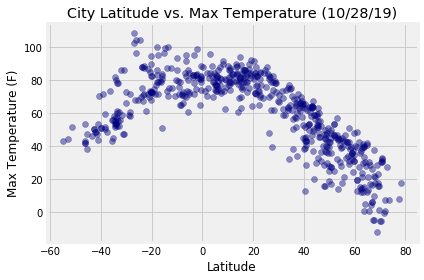

In [57]:
x = cities_df['latitude']
y = cities_df['temp']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.43)
plt.grid(True)
plt.title('City Latitude vs. Max Temperature ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
# Save Figure
plt.savefig('../output_data/MaxTempvsLat.png')
# Show Figure
plt.show()



#### Latitude vs. Humidity Plot

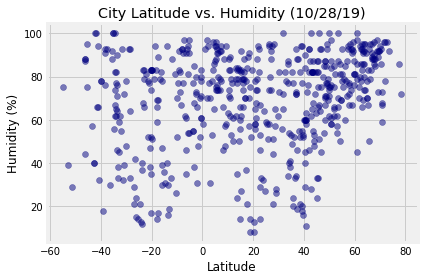

In [65]:
x = cities_df['latitude']
y = cities_df['humidity']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.5)
plt.grid(True)
plt.title('City Latitude vs. Humidity ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
# Save Figure
plt.savefig('../output_data/HumidityvsLat.png')
# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

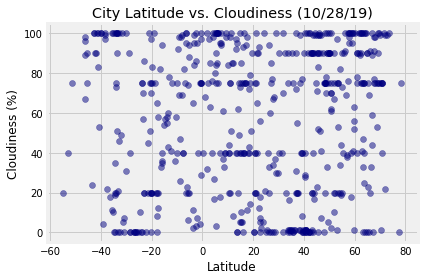

In [78]:
x = cities_df['latitude']
y = cities_df['cloudiness']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.5)
plt.grid(True)
plt.title('City Latitude vs. Cloudiness ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
# Save Figure
plt.savefig('../output_data/CloudinessvsLat.png')
# Show Plot
plt.show()

#### Latitude vs. Wind Speed

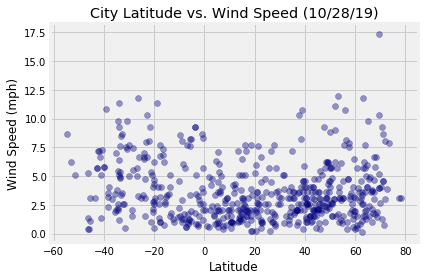

In [85]:
x = cities_df['latitude']
y = cities_df['wind speed']
date = cities_df.iloc[0]['date'].split(' ')[0]

# Plot
plt.scatter(x, y, color='navy', alpha=0.4)
plt.grid(True)
plt.title('City Latitude vs. Wind Speed ' + '(' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
# Save Figure
plt.savefig('../output_data/WindSpeedvsLat.png')
# Show Plot
plt.show()

## Linear Regression

In [87]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regress(x,y):
    vals = scipy.stats.linregress(x, y)
    return vals

In [88]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = cities_df.query('latitude > 0')
south_hemi = cities_df.query('latitude < 0')

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7839061587465824


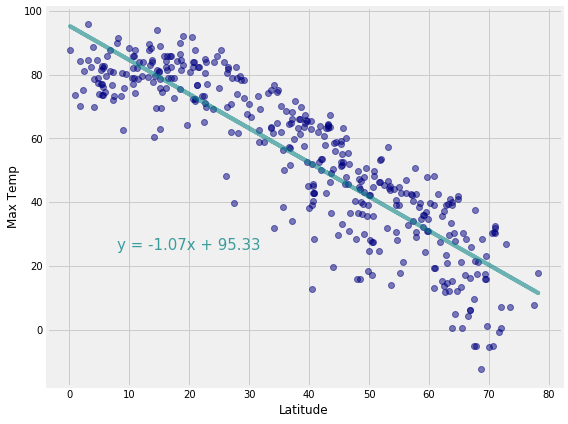

In [104]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['temp']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', alpha=.5, color='navy')
plt.plot(x, intercept + slope*x, color='teal', label='fitted line', alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line, xy=(8,25), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41768533107913114


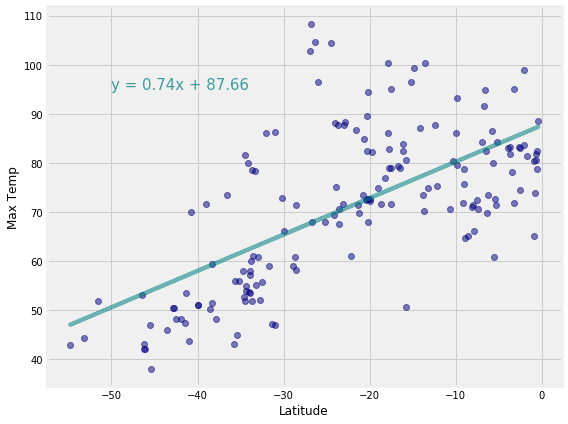

In [106]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['temp']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line, xy=(-50,95), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04786814912071406


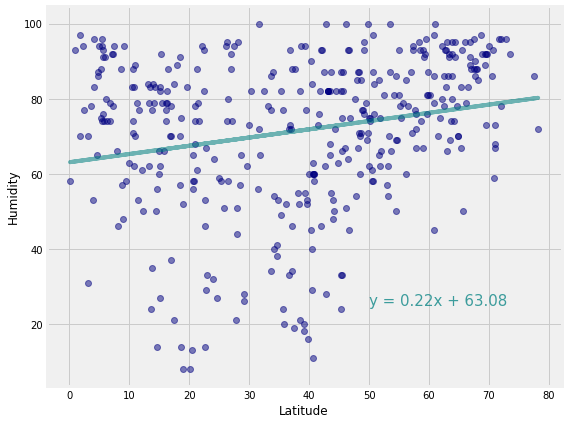

In [111]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['humidity']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line, xy=(50,25), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 3.7094893364368126e-05


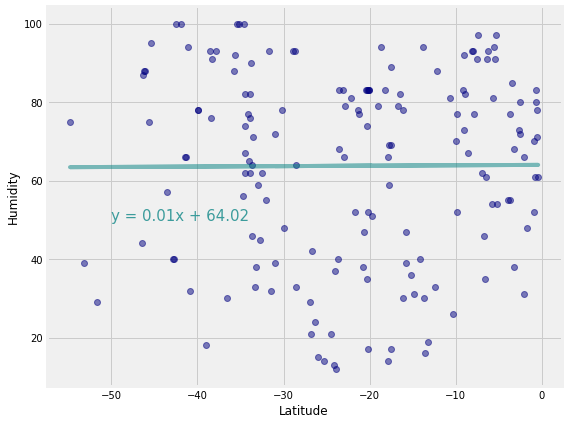

In [117]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['humidity']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy', alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line', alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line, xy=(-50,50), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009546804856808535


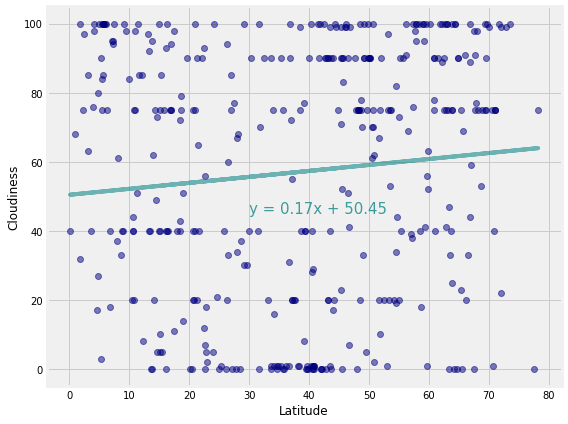

In [122]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['cloudiness']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy', alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line', alpha=.55)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line, xy=(30,45), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0004904983417999949


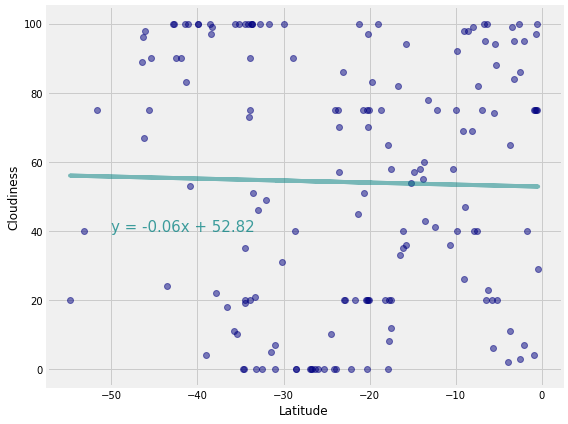

In [130]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['cloudiness']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line, xy=(-50,40), color='teal', size=15, alpha=.75)
plt.tight_layout()
# Show Plot
plt.show()


#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.054341906820955396


[]

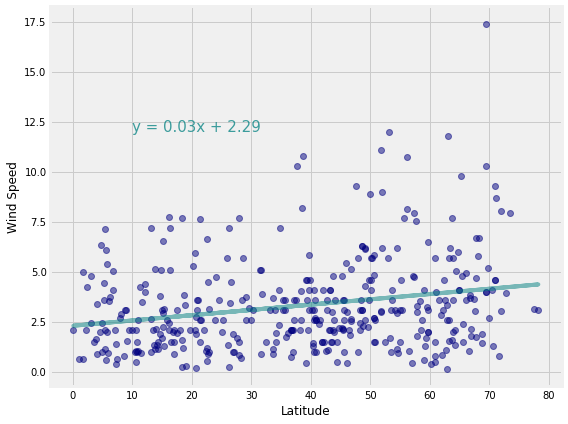

In [132]:
# Collect graph values
x = north_hemi['latitude']
y = north_hemi['wind speed']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy', alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line, xy=(10,12), color='teal', size=15,alpha=.75)
plt.tight_layout()
# Show Plot
plt.plot()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03633584152044614


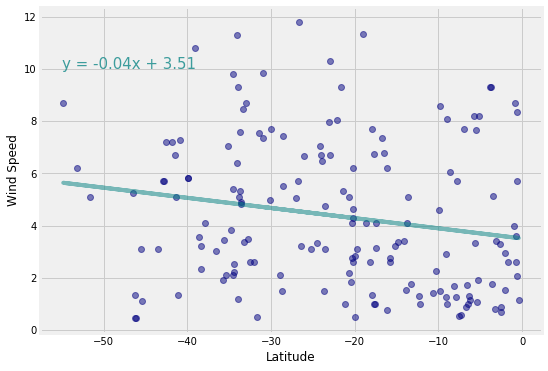

In [135]:
# Collect graph values
x = south_hemi['latitude']
y = south_hemi['wind speed']

# Call linear regression function
vals = lin_regress(x,y)
# Collect r-squared
r_squared = vals[2]**2
# Collect slope
slope = vals[0]
# Collect y-intercept
intercept = vals[1]
# Collect line 
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Print r-squared val
if vals[2] < 0:
    sign = '-'
else:
    sign = ''
print('The r-squared is: '+ sign + str(vals[2]**2))
# Plot Graph
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='original data', color='navy',alpha=.5)
plt.plot(x, intercept + slope*x, color='teal', label='fitted line',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line, xy=(-55,10), color='teal', size=15, alpha=.75)
# Show Plot
plt.show()

In [136]:
save_file = cities_df.to_csv(output_data_file)

## Observable Trends
- Temperature is affected by latitude (closer to equator, greater temp)
- Linear Regression trends were almost non existent for any Humidity/Wind Speed/Cloudiness for latitude on either Hemisphere
- Largest spread of values among the value types is Cloudiness
